### Problem statement.

Fitting a regression model on a financial time series.

We will use TATA GLOBAL dataset from quandl


In [ ]:
### import library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', '.*do not.*',)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1. Import data and understand the data

In [ ]:
## import  dataset
data=pd.read_csv('/content/NSE-TATAGLOBAL11.csv')

FileNotFoundError: ignored

In [ ]:
### checking on the data
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [ ]:
### the shape of the data
data.shape

(1235, 8)

In [ ]:
# the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


We can notice  that the date column
is an object we will convert that it to date type.

### 2. Data cleaning and manipulation

In [ ]:
### converting the date from object to date and setting as index
data.Date=pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index=data.Date
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1235 non-null   datetime64[ns]
 1   Open                  1235 non-null   float64       
 2   High                  1235 non-null   float64       
 3   Low                   1235 non-null   float64       
 4   Last                  1235 non-null   float64       
 5   Close                 1235 non-null   float64       
 6   Total Trade Quantity  1235 non-null   float64       
 7   Turnover (Lacs)       1235 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 86.8 KB


In [ ]:
### looking for missing values
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
### looking for duplicated values
data.duplicated().any()

False

In [ ]:
#### sorting the index
data.sort_index(ascending=True,axis=0,inplace=True)

### 3. Exploratory data analysis

In [ ]:
### statistical summary
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


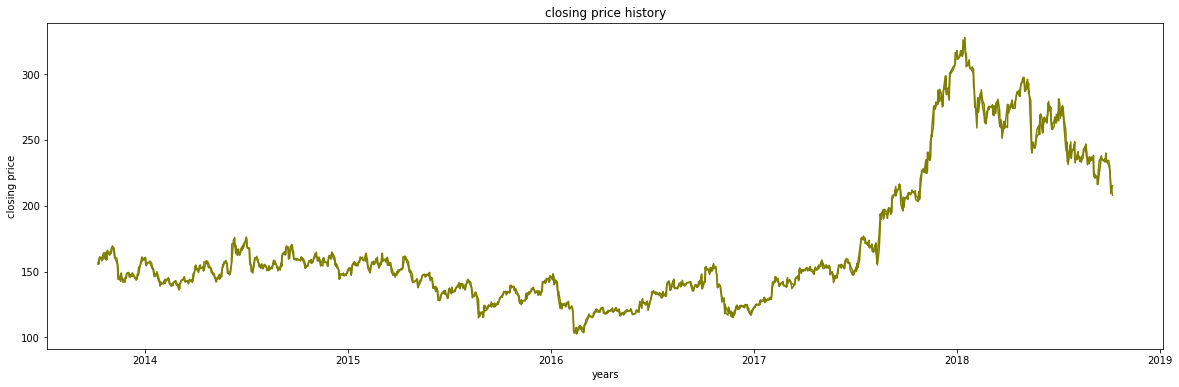

In [ ]:
### taking a look at the closing price of the stock
plt.figure(figsize=(20,6))
plt.title('closing price history')
plt.xlabel('years')
plt.ylabel('closing price')
plt.plot(data[['Close']],label='closing price history',color='olive')
plt.show()

The closing price was highest in  2018 and lowest in 2016

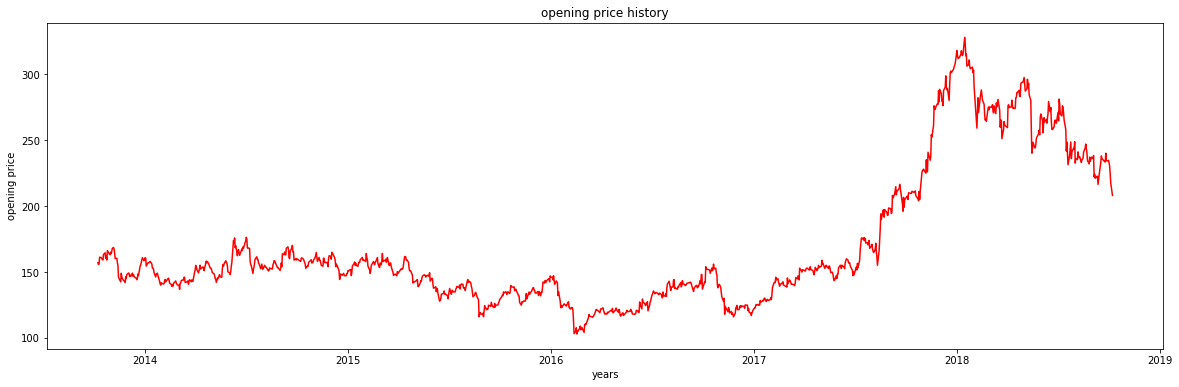

In [ ]:
##### taking a look at the opening price of the stock
plt.figure(figsize=(20,6))
plt.title('opening price history')
plt.xlabel('years')
plt.ylabel('opening price')
plt.plot(data['Open'],color='red')
plt.show()

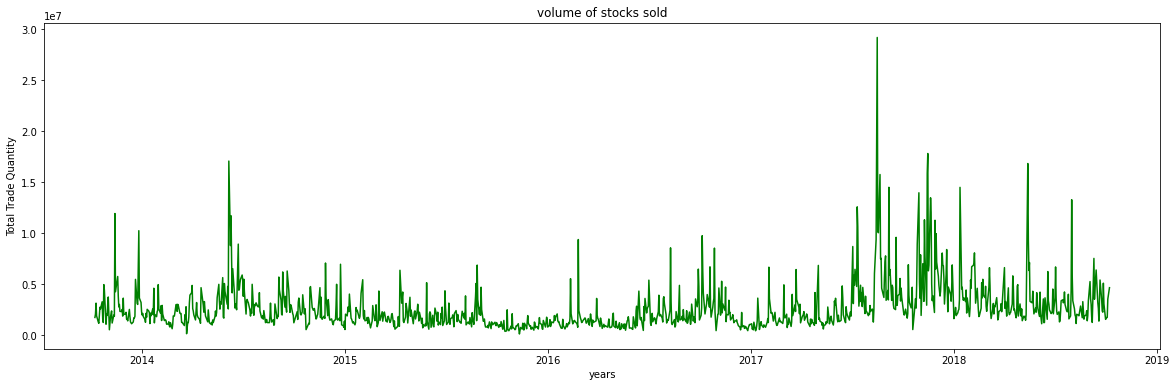

In [ ]:
##### volume of shares traded
plt.figure(figsize=(20,6))
plt.title('volume of stocks sold')
plt.xlabel('years')
plt.ylabel('Total Trade Quantity')
plt.plot(data['Total Trade Quantity'],color='green')
plt.show()

In [ ]:
### percentage change
change_closing=data['Close'].pct_change()
change_closing.head().dropna()

Date
2013-10-09   -0.001605
2013-10-10    0.029572
2013-10-11   -0.000624
2013-10-14   -0.003749
Name: Close, dtype: float64

In [ ]:
### reshaping the data into 1 week
def resample(distance, label = 'right'):
    
    resample = data['Close'].resample(distance, label = label).last().dropna()
    return resample

In [ ]:
### viewing the data in 1 week
df_1week = resample('1w') 
df_1week.head(20)

Date
2013-10-13    160.05
2013-10-20    164.20
2013-10-27    163.85
2013-11-03    169.50
2013-11-10    160.10
2013-11-17    143.95
2013-11-24    141.80
2013-12-01    148.90
2013-12-08    146.20
2013-12-15    145.15
2013-12-22    153.10
2013-12-29    158.05
2014-01-05    156.35
2014-01-12    155.95
2014-01-19    146.20
2014-01-26    144.25
2014-02-02    141.00
2014-02-09    143.35
2014-02-16    140.55
2014-02-23    142.00
Freq: W-SUN, Name: Close, dtype: float64

### 4. Moving averages 

In [ ]:
#creating dataframe with date and the target variable
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close'])
for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# While splitting the data into train and validation set, 
# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

#creating predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
  a = train['Close'][len(train)-248+i:].sum() + sum(preds)
  b = a/248
  preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(987, 2)

 Shape of validation set:
(248, 2)

 RMSE value on validation set:
104.51415465984348


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


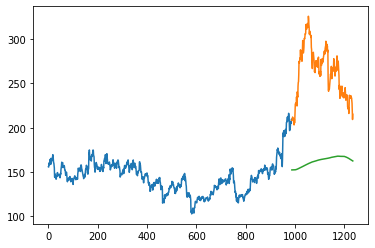

In [ ]:
#plot the prediction and actual.
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

The RMSE value is close to 105 but the results are not very promising. The predicted values are of the same range as the observed values in the train set (there is an increasing trend initially and then a slow decrease)

### 5. Linear Regression

In [ ]:
# we create more features.
## there a high likelihood that the closing price of a share is adversely
#affected by time either week day, weekend , month
for attr in ['year', 'month', 'day', 'week', 'dayofweek']:
  data[attr] = getattr(data['Date'].dt, attr)
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),year,month,day,week,dayofweek
Date,,,,,,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94,2013,10,8,41,1
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49,2013,10,9,41,2
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80,2013,10,10,41,3
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76,2013,10,11,41,4
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09,2013,10,14,42,0


In [ ]:
## the  features we will use
features=['year','month','day','week','dayofweek']
new_data=data[['Close','year','month','day','week','dayofweek']]

In [ ]:
# identify if the day is a weekend or week day.. 
new_data['mon_fri'] = 0
for i in range(0,len(new_data)):
    if (new_data['dayofweek'][i] == 0 or new_data['dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0


In [ ]:
## our new dataset
new_data.head()

,Close,year,month,day,week,dayofweek,mon_fri
Date,,,,,,,
2013-10-08,155.80,2013,10,8,41,1,0
2013-10-09,155.55,2013,10,9,41,2,0
2013-10-10,160.15,2013,10,10,41,3,0
2013-10-11,160.05,2013,10,11,41,4,1
2013-10-14,159.45,2013,10,14,42,0,1


In [ ]:
### label and features
x=new_data.drop('Close',axis=1)
y=new_data['Close']
## standardizing the fetures
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [ ]:
## creating train and test dataset
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=24)

In [ ]:
### creating our linear model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
#prediction
y_pred=model.predict(x_test)

In [ ]:
#### checking the performance of the model
from sklearn.metrics import r2_score
print('our R^2 is :', r2_score(y_test,y_pred))


our R^2 is : 0.356024523816049


In [ ]:
## rmse
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
rmse

41.942993552286914

the linear regression has given a smaller rmse than moving averages hence 
has done a better job.. lets see abut Knn

### 5. K-NN Regression model

In [ ]:
## import libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
## hyperparameter tuning
params={'n_neighbors':[2,3,4,5,6,7,8,9]}
knn=KNeighborsRegressor()
model_knn=GridSearchCV(knn,params,cv=5)
##fitting the model
model_knn.fit(x_train,y_train)
#### predicting
y_pred2=model_knn.predict(x_test)
##r^2 metrics
print('our R^2:' ,r2_score(y_test,y_pred2))
##rmse
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred2)),2)))
print('rmse:',rmse)

our R^2: 0.7541147574181017
rmse: 25.91737373112095


The R^2 has increased hence better than linear regression and the rmse is smaller hence its a better model to predict.

### 6. light GBM regressor

In [ ]:
### import
from lightgbm import LGBMRegressor 
lgbm=LGBMRegressor(max_depth=1,n_estimators=500)
lgbm.fit(x_train,y_train)
y_pred3=lgbm.predict(x_test)
#### metrics
print('r^2 score;',r2_score(y_test,y_pred3))
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred3)),2)))
print('rmse', rmse)

r^2 score; 0.7865204750860576
rmse 24.149206936766348


The r^2 is 0.7865 and the rmse has reduced hence the model has performed better than the three.

### 7. Recommendation.

The Light GBM has  performed very well compared to the other models 
used above, followed closely by KNN, I would recommend them for financial time series modelling.

We can improve the modelling by feature engineering and including more features and filtering when the trading did not happen.
In this one we can use  fast.Ai to engineer new features.

Ideas in future we can try:



1.   More features in LightGBM.
2.   Known algorithms like ARIMA.
1.  PROPHET model
2.   Neural networks i.e MLP regressor.
4. Long short term memory using Keras

Some of the above models can reduce the RMSE and increase the R^2 even better than our models.






